In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cri_df= pd.read_csv("Batsman_All.csv")
cri_df.shape

(128, 17)

In [7]:
cri_df.head(2)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,hundred,fifty,zero,four,six,rating,res
0,Abdur Razzak,2004-2014,153,97,39,779,53,13.43,1020,76.37,0,1,12,55,21,12.371973,0
1,Abul Hasan,2012-2018,7,3,0,11,7,3.66,16,68.75,0,0,0,1,0,5.687500,0


In [3]:
cri_df.count()

Player     128
Span       128
Mat        128
Inns       128
NO         128
Runs       128
HS         128
Ave        128
BF         128
SR         128
hundred    128
fifty      128
zero       128
four       128
six        128
rating     128
res        128
dtype: int64

In [4]:
cri_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   128 non-null    object 
 1   Span     128 non-null    object 
 2   Mat      128 non-null    int64  
 3   Inns     128 non-null    int64  
 4   NO       128 non-null    int64  
 5   Runs     128 non-null    int64  
 6   HS       128 non-null    int64  
 7   Ave      128 non-null    float64
 8   BF       128 non-null    int64  
 9   SR       128 non-null    float64
 10  hundred  128 non-null    int64  
 11  fifty    128 non-null    int64  
 12  zero     128 non-null    int64  
 13  four     128 non-null    int64  
 14  six      128 non-null    int64  
 15  rating   128 non-null    float64
 16  res      128 non-null    int64  
dtypes: float64(3), int64(12), object(2)
memory usage: 17.1+ KB


In [5]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = cri_df.iloc[:,2:16]  #independent columns
y = cri_df.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

plt.show()

     Specs         Score
6       BF  86929.440847
3     Runs  65672.012185
11    four   6440.375125
4       HS   2979.952950
1     Inns   1376.110286
13  rating   1147.113549
0      Mat   1027.265846
5      Ave    630.558912
12     six    585.642925
9    fifty    466.889660


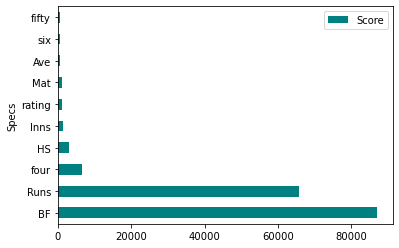

In [6]:
f = featureScores.nlargest(10,'Score')
f.plot(x= 'Specs', y = 'Score', kind='barh', color ='teal')
#featureScores.plot(kind='barh', nlargest(10),color ='teal')
plt.show()

In [22]:
cri_df.columns
feature_df = cri_df[['BF','Runs', 'four', 'HS', 'Inns', 'rating','six', 'Mat','fifty','Ave']]

X = np.asarray(feature_df)
y = np.asarray(cri_df['res'])


y[0:15]

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)
X_test.shape

(39, 14)

In [12]:
from sklearn import svm

classifier = svm.SVC(kernel = 'linear', gamma = 'auto', C = 2)
classifier.fit(X_train, y_train)

y_predict = classifier.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score

print('Accuracy score: ',accuracy_score(y_test, y_predict))

Accuracy score:  0.9487179487179487


In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        26
           1       0.92      0.92      0.92        13

    accuracy                           0.95        39
   macro avg       0.94      0.94      0.94        39
weighted avg       0.95      0.95      0.95        39



In [15]:
k = cri_df.sort_values(by='rating', ascending = False)

In [16]:
s = k.head(10)

In [17]:
k = s.Player
k.head(10)

15       Anwar Hossain
51       Mahbubul Alam
119        Tamim Iqbal
113      Soumya Sarkar
87         Nurul Hasan
49           Liton Das
38         Imrul Kayes
107    Shakib Al Hasan
12        Anamul Haque
105    Shahriar Nafees
Name: Player, dtype: object